In [1]:
import tensorflow as tf
import numpy as np

In [2]:
def processing_image(dataset, dataset_labels, augementation_factor=1):
    augmented_image = []
    
    for num in range (0, dataset.shape[0]):
        for i in range(0, augementation_factor):

            augmented_image.append(dataset[num])
            temp = dataset[num]
            aug_img = tf.contrib.keras.preprocessing.image.random_rotation(temp, 40, row_axis=0, col_axis=1, channel_axis=2)

            augmented_image.append(aug_img)
           
                
    return np.array(augmented_image)

In [3]:
import pandas as pd
import cv2
from numpy import *

df = pd.read_csv('balanced_cars.csv')
df['label'] = df['is_premium'].apply(lambda v: 1 if v else 0)
df.shape

(3007, 3)

In [4]:
#alexnet expected input is 227 * 227 *3
process_dimension = 227
for idx in range(len(df)):
#for idx in range(5):
    
    if idx % 50 == 0:
        print ('processing {}'.format(idx))

    car_url_id = df.loc[idx, 'car_url_id']
    image_file_name = '{}.png'.format(car_url_id)
    
    img = cv2.imread('img/{}'.format(image_file_name))
    img = cv2.resize(img, (process_dimension, process_dimension))
    
    #dont care the label as we only feed in 1 and we will save the augmented image with car_url_id
    aug_dat = processing_image(img.reshape([1,227,227,3]), [1])
    #each image we only doubled it
    for i in range(2):
        if i==0:
            cv2.imwrite('aug_img2/{}'.format(image_file_name),aug_dat[0])
        else:
            cv2.imwrite('aug_img2/{}'.format(car_url_id+"_aug.png"),aug_dat[1])

processing 0
processing 50
processing 100
processing 150
processing 200
processing 250
processing 300
processing 350
processing 400
processing 450
processing 500
processing 550
processing 600
processing 650
processing 700
processing 750
processing 800
processing 850
processing 900
processing 950
processing 1000
processing 1050
processing 1100
processing 1150
processing 1200
processing 1250
processing 1300
processing 1350
processing 1400
processing 1450
processing 1500
processing 1550
processing 1600
processing 1650
processing 1700
processing 1750
processing 1800
processing 1850
processing 1900
processing 1950
processing 2000
processing 2050
processing 2100
processing 2150
processing 2200
processing 2250
processing 2300
processing 2350
processing 2400
processing 2450
processing 2500
processing 2550
processing 2600
processing 2650
processing 2700
processing 2750
processing 2800
processing 2850
processing 2900
processing 2950
processing 3000


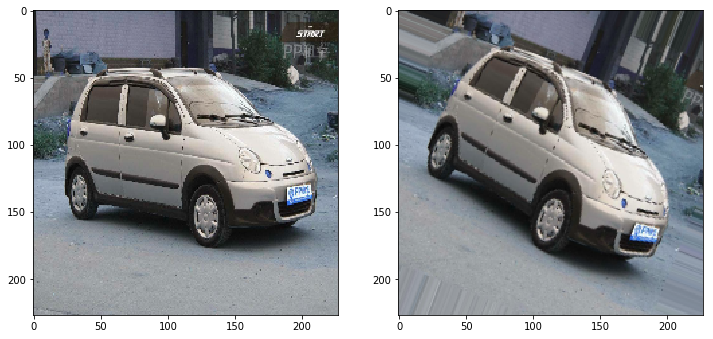

In [5]:
#verifying the result
#try to read 6 images to view and compare
import matplotlib.pyplot as plt
%matplotlib inline

imgs = []

for idx in range(2):
    car_url_id = df.loc[idx, 'car_url_id']
    image_file_name = '{}.png'.format(car_url_id)
    imgs.append(cv2.imread('aug_img2/{}'.format(image_file_name)))
    imgs.append(cv2.imread('aug_img2/{}'.format(car_url_id+"_aug.png")))

w=10
h=10
fig=plt.figure(figsize=(12, 12))
columns = 2
rows = 1
for i in range(0, columns*rows):
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(imgs[i])

#### creating new car label csv file

In [6]:
df.head()

,car_url_id,is_premium,label
0,2010-xuefolan-lechi-d77BsJBbW9uE,False,0
1,2009-fengtian-weichi-dIIJBBIhZZWZ,False,0
2,2014-MINI-COOPER-dB7k0BBZ9XbX,True,1
3,2013-aodi-A4L-dBs0iJQXuXwX,True,1
4,2009-kaidilake-CTS-d00QkBJbwwhN,True,1


In [7]:
df_aug=pd.DataFrame()
df_aug['car_url_id']=df['car_url_id'].apply(lambda v: '{}_aug'.format(v.split('.png')[0]))
df_aug['label']=df['label']
df_aug.head()

,car_url_id,label
0,2010-xuefolan-lechi-d77BsJBbW9uE_aug,0
1,2009-fengtian-weichi-dIIJBBIhZZWZ_aug,0
2,2014-MINI-COOPER-dB7k0BBZ9XbX_aug,1
3,2013-aodi-A4L-dBs0iJQXuXwX_aug,1
4,2009-kaidilake-CTS-d00QkBJbwwhN_aug,1


In [8]:
#df.drop('is_premium',axis=1,inplace=True)
df_final=df.append(df_aug)
df_final.shape

(6014, 3)

In [9]:
df_final.tail()

,car_url_id,is_premium,label
3002,2011-woerwo-XC60-dsIiIBB9XuEw_aug,NaN,0
3003,2015-fengtian-kaimeirui-dQkIQsBwuNEE_aug,NaN,0
3004,2015-baoma-3xi-dBiBk7JhNZXE_aug,NaN,1
3005,2015-kaidilake-XTS-d0kBQi7WubWZ_aug,NaN,1
3006,2011-lingmu-yuyan-d7J70k7Xu9hw_aug,NaN,0


#### Data Analysis

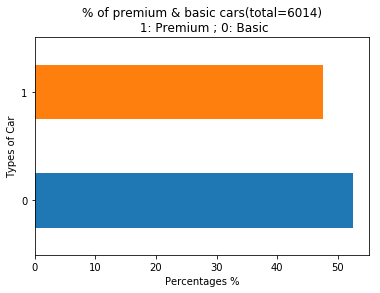

In [10]:

(df_final.label.value_counts()/len(df_final)*100).plot(kind='barh',title='% of premium & basic cars(total=6014)\n 1: Premium ; 0: Basic')
plt.xlabel('Percentages %')
plt.ylabel('Types of Car')
plt.show()

In [11]:
df_final.label.value_counts()/len(df_final)*100

0    52.544064
1    47.455936
Name: label, dtype: float64

In [12]:
df_final.label.value_counts()

0    3160
1    2854
Name: label, dtype: int64

In [13]:
df_final.to_csv('car_augmented_file.csv',index = False)

In [14]:
df.head()

,car_url_id,is_premium,label
0,2010-xuefolan-lechi-d77BsJBbW9uE,False,0
1,2009-fengtian-weichi-dIIJBBIhZZWZ,False,0
2,2014-MINI-COOPER-dB7k0BBZ9XbX,True,1
3,2013-aodi-A4L-dBs0iJQXuXwX,True,1
4,2009-kaidilake-CTS-d00QkBJbwwhN,True,1


In [15]:
df['model']=df['car_url_id'].apply(lambda x: x.split('-')[1])

In [16]:
df.head()

,car_url_id,is_premium,label,model
0,2010-xuefolan-lechi-d77BsJBbW9uE,False,0,xuefolan
1,2009-fengtian-weichi-dIIJBBIhZZWZ,False,0,fengtian
2,2014-MINI-COOPER-dB7k0BBZ9XbX,True,1,MINI
3,2013-aodi-A4L-dBs0iJQXuXwX,True,1,aodi
4,2009-kaidilake-CTS-d00QkBJbwwhN,True,1,kaidilake


There are total 16 car model for premium type


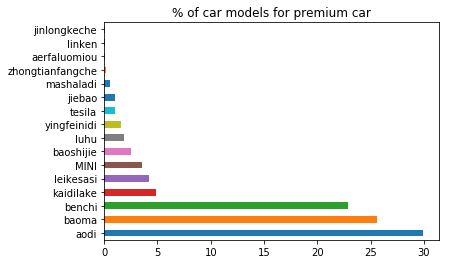

In [17]:
#df_model=df.groupby('label')['model'].value_counts()/df.groupby('label').size()*100
#df_model2=df_model.reset_index()
#df_model2.head()
#df_model2.columns=['label','model','Percent']
#df_model2.head()

plot1=df[df['label']==1]
print("There are total {} car model for premium type".format(plot1['model'].nunique()))
(plot1['model'].value_counts()/len(plot1)*100).plot(kind='barh',title='% of car models for premium car')

There are total 68 car model for premium type


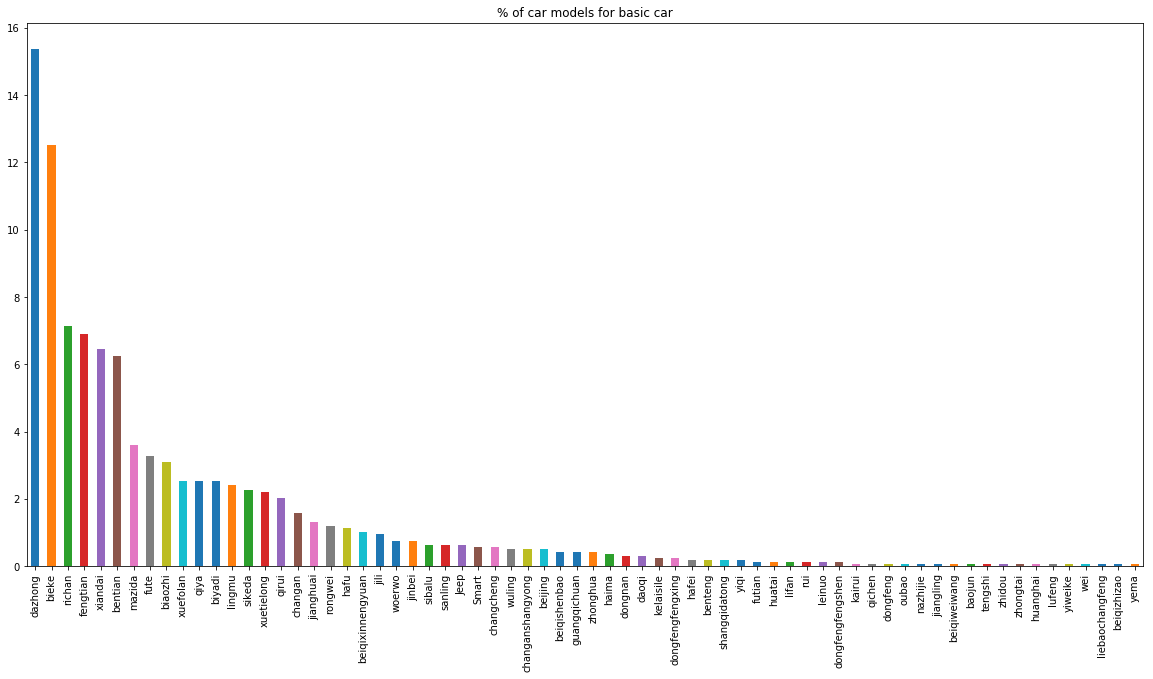

In [19]:
plot1=df[df['label']==0]
len(plot1)
plt.figure(figsize=(20,10))
print("There are total {} car model for premium type".format(plot1['model'].nunique()))
(plot1['model'].value_counts()/len(plot1)*100).plot(kind='bar',title='% of car models for basic car')
